In [19]:
import numpy as np
import matplotlib.pyplot as plt


constants = {
    "NUMBER_OF_VALIDATORS": 500000,
    "AVG_BLOCK_REWARD": 0.025,
    "NUMBER_OF_BUILDERS": 30,
    "NUMBER_OF_COMPETITIVE_BUILDERS": 5
}

def generate_block_values(num_competitive_builders, num_total_builders, mean_competitive, sigma_competitive, mean_rest, sigma_rest):
    competitive_block_values = np.random.lognormal(mean_competitive, sigma_competitive, num_competitive_builders)
    rest_builder_values = np.random.lognormal(mean_rest, sigma_rest, num_total_builders - num_competitive_builders)
    return np.concatenate((competitive_block_values, rest_builder_values))

def simulate_rewards_scenario(initial_validator_stakes, num_builders, num_competitive_builders, num_rounds, mean_competitive, sigma_competitive, mean_rest, sigma_rest):
    validator_stakes = initial_validator_stakes.copy()
    builder_rewards = np.zeros(num_builders)

    for _ in range(num_rounds):
        # Generate new builder values
        builder_values = generate_block_values(num_competitive_builders, num_builders, mean_competitive, sigma_competitive, mean_rest, sigma_rest)

        # Validator chooses the builder with the highest value
        selected_builder_idx = np.argmax(builder_values)
        selected_value = builder_values[selected_builder_idx]

        # Update validator and builder rewards
        validator_stakes[selected_builder_idx % len(validator_stakes)] += selected_value
        builder_rewards[selected_builder_idx] += 0.05 * selected_value

    return validator_stakes, builder_rewards

initial_validator_stakes = [32]*constants["NUMBER_OF_VALIDATORS"]
initial_builder_values = [0]*constants["NUMBER_OF_BUILDERS"]
num_rounds = 300000

mean_competitive = 0.5
sigma_competitive = 0.5
mean_rest = 0.1
sigma_rest = 0.5

final_validator_stakes, final_builder_rewards = simulate_rewards_scenario(initial_validator_stakes, constants["NUMBER_OF_BUILDERS"], constants["NUMBER_OF_COMPETITIVE_BUILDERS"], num_rounds, mean_competitive, sigma_competitive, mean_rest, sigma_rest)

# Convert the list to a NumPy array
final_stakes_array = np.array(final_validator_stakes)

# Sort the array in ascending order
sorted_stakes = np.sort(final_stakes_array)

# Get the lowest 20 values
lowest_20 = sorted_stakes[:20]

# Get the highest 20 values
highest_20 = sorted_stakes[-20:]

print("Lowest 20 stake values:")
print(lowest_20)

print("Highest 20 stake values:")
print(highest_20)

#print("Final validator stakes:")
#print(final_validator_stakes)

print("Final builder rewards:")
print(final_builder_rewards)

Lowest 20 stake values:
[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 32. 32.]
Highest 20 stake values:
[ 20701.19324093  20782.69773682  20794.33376906  20820.40976887
  20852.10866923  20897.32598453  20918.05386214  20924.13560826
  20936.22919535  20936.4096504   20975.45807079  20979.72039683
  20990.06208627  21012.42184967  21081.28106792 112437.92092617
 113257.00378099 113724.4851999  113991.69685787 114239.36880713]
Final builder rewards:
[5661.25018905 5684.62425999 5710.36844036 5620.29604631 5697.98484289
 1022.24211542 1021.12746023 1052.4640534  1044.60678041 1047.90310431
 1029.86025763 1028.7306086  1031.86095013 1027.00076852 1033.45966205
 1024.79771882 1043.26629923 1021.0539608  1045.22048252 1047.38601984
 1037.53488684 1044.30269311 1049.02109248 1039.42048844 1026.58345887
 1038.11668845 1045.21145977 1047.17290354 1025.35666854 1041.00543346]


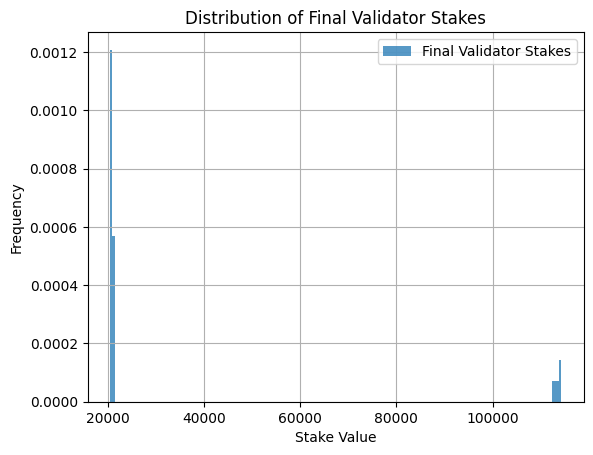

In [20]:
filtered_validator_stakes = [stake for stake in final_validator_stakes if stake != 32]

plt.hist(filtered_validator_stakes, bins=200, density=True, alpha=0.75, label='Final Validator Stakes')

plt.xlabel('Stake Value')
plt.ylabel('Frequency')
plt.title('Distribution of Final Validator Stakes')
plt.legend()
plt.grid(True)
plt.show()